I just want to check how different a model that explicitely focus on attention can be

In [166]:
from keras.models import Model
from keras.layers import Input, Dense, Multiply
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

## our data, very correlated with a high deviation on the uncorrelated value
x = np.array([[1, 3, 500], [6, 2, 700], [8, 1, 300], [9, 0, 200], [3, 3, 800]])
y = np.array([[3], [12], [8], [0], [9]]) # our y is just x[0] * x[1] ignoring the 3rd value

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_158 (InputLayer)       (None, 3)                 0         
_________________________________________________________________
hidden (Dense)               (None, 75)                225       
_________________________________________________________________
dense_230 (Dense)            (None, 1)                 75        
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________
[[ 3]
 [12]
 [ 8]
 [ 0]
 [ 9]]
[[ 3.0123894]
 [11.898903 ]
 [ 7.9141927]
 [-0.155985 ]
 [ 9.249007 ]]
Learned weights


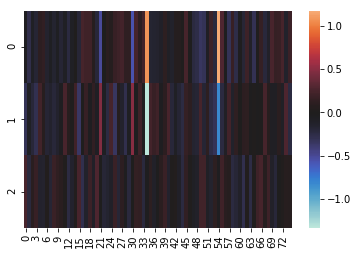

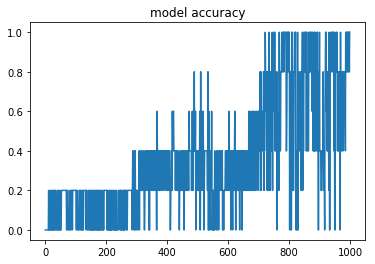

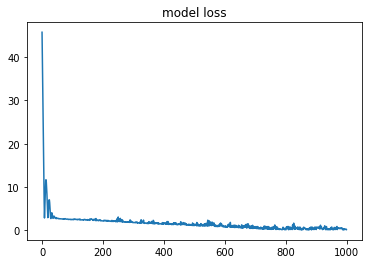

In [171]:
# non-attention model

rInput = Input(shape=(3,))
rHidden = Dense(75, activation="elu", name='hidden', use_bias=False)(rInput)
rOutput = Dense(1, use_bias=False)(rHidden)
regularModel = Model(inputs=rInput, outputs=rOutput)

regularModel.summary()

regularModel.compile(optimizer=Adam(lr=0.001), loss="mae", metrics=['accuracy'])
training = regularModel.fit(x, y, epochs=1000, verbose=0)

pred = regularModel.predict(x)
print(y)
print(pred)

print("Learned weights")
weights = np.array(regularModel.get_layer('hidden').get_weights()[0])
sns.heatmap(weights, center=0)
plt.show()

plt.plot(training.history['acc'])
plt.title('model accuracy')
plt.show()

plt.plot(training.history['loss'])
plt.title('model loss')
plt.show()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_161 (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
dense_235 (Dense)               (None, 30)           90          input_161[0][0]                  
__________________________________________________________________________________________________
aBlock (Dense)                  (None, 3)            90          dense_235[0][0]                  
__________________________________________________________________________________________________
multiply_76 (Multiply)          (None, 3)            0           aBlock[0][0]                     
                                                                 input_161[0][0]                  
__________

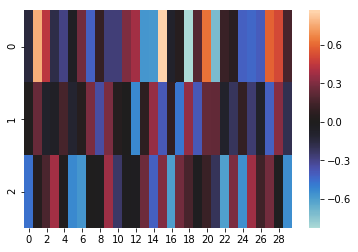

Attention Filter


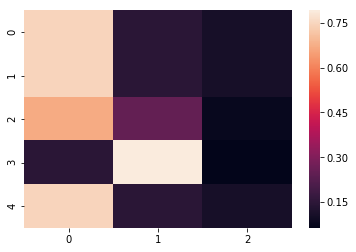

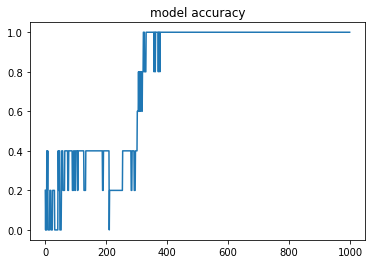

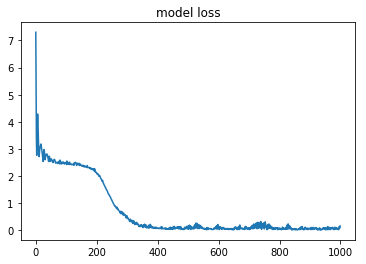

In [174]:
# attention model

aInput = Input(shape=(3,))

aBlock = Dense(30, activation="tanh", use_bias=False)(aInput)
aBlock = Dense(3, activation="softmax", name='aBlock', use_bias=False)(aBlock)

aCombine = Multiply()([aBlock, aInput])

aHidden = Dense(30, activation="elu", name='hidden', use_bias=False)(aCombine)
aOutput = Dense(1, use_bias=False)(aHidden)
attentionModel = Model(inputs=aInput, outputs=aOutput)

attentionModel.summary()

attentionModel.compile(optimizer=Adam(lr=0.001), loss="mae", metrics=['accuracy'])
training = attentionModel.fit(x, y, epochs=1000, verbose=0)

pred = attentionModel.predict(x)
print(y)
print(pred)

print("Learned weights")
weights = np.array(attentionModel.get_layer('hidden').get_weights()[0])
sns.heatmap(weights, center=0)
plt.show()

attentionModelFilter = Model(inputs=aInput, outputs=aBlock)
attentionModelFilterPref = attentionModelFilter.predict(x)
print("Attention Filter")
sns.heatmap(attentionModelFilterPref)
plt.show()

plt.plot(training.history['acc'])
plt.title('model accuracy')
plt.show()

plt.plot(training.history['loss'])
plt.title('model loss')
plt.show()